In [28]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import mplfinance as mpf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, callbacks

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low     Close    Volume  last_close
Date                                                                       
2024-07-08  77.610001  77.660004  77.040001 -0.480003   2697400    0.000000
2024-07-09  76.959999  76.970001  76.300003 -0.290001   3362800   77.129997
2024-07-10  76.970001  77.849998  76.949997  0.779999   2984500   76.669998
2024-07-11  78.150002  78.589996  77.860001 -0.209999   3168500   77.750000
2024-07-12  79.519997  79.790001  79.180000 -0.279999   3051900   77.940002
2024-07-15  79.150002  79.150002  78.040001 -1.029999   2666900   79.239998
2024-07-16  77.959999  78.690002  77.919998  0.629997   2668700   78.120003
2024-07-17  78.500000  79.830002  78.500000  1.260002   3658900   78.589996
2024-07-18  80.000000  80.010002  77.989998 -1.940002   3232900   79.760002
2024-07-19  78.339996  78.760002  78.160004  0.370003   2929800   78.059998
2024-07-22  79.620003  79.809998  78.970001 -0.459999   3521000   78.709999
2024-07-23  

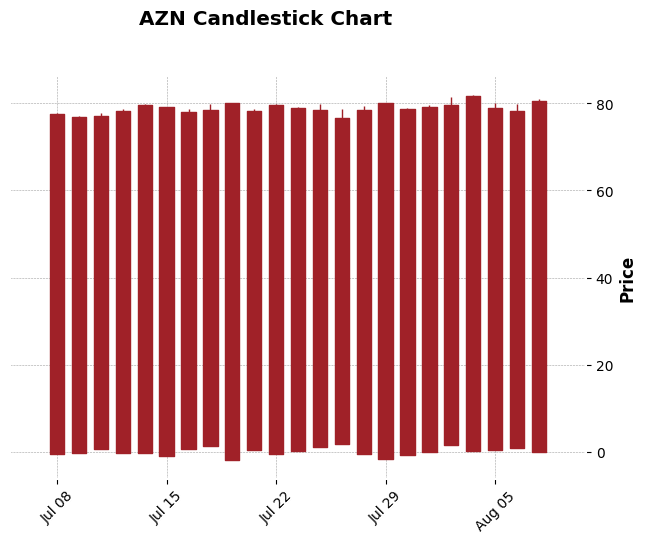

In [58]:

# Download recent data
recent_data = yf.download("AZN", period="1mo", interval="1d")

# Drop unnecessary columns
recent_data = recent_data.drop(columns=["Adj Close"])
recent_data["last_close"] = recent_data["Close"].shift(1)
recent_data.Close = recent_data.Close - recent_data.Open
recent_data.fillna(0, inplace=True)
print(recent_data)
# Create a candlestick chart
mpf.plot(
    recent_data,
    type="candle",
    style="charles",
    title="AZN Candlestick Chart",
    ylabel="Price",
)

# Show the plot
mpf.show()

In [59]:

X = recent_data.drop(columns=["Close","Volume"])
y = recent_data.drop(columns=["High","Low","Open","Volume", "last_close"])
train_X,val_X,train_y,val_y = train_test_split(X,y,random_state = 1)
input_shape = [4]


early_stopping = callbacks.EarlyStopping(
    min_delta=0.0001, # minimium amount of change to count as an improvement
    patience=40, # how many epochs to wait before stopping
    restore_best_weights=True,
)


model = keras.Sequential([
    layers.Dense(128, activation='relu',input_shape = input_shape),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])


optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(

    optimizer=optimizer,
    loss="mse",
)
EPOCHS = 1000
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=64,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    verbose=0,
    
)



c:\Users\yahli\anaconda3\envs\Stocks\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
check_data =  yf.download("AZN",period= "5d") 
check_data = check_data.drop(columns=["Adj Close"])
check_data["last_close"] = check_data["Close"].shift(1)
print(check_data)
check_X = check_data.drop(columns=["Close","Volume"])
# print(checl_data.head())
print(check_X.tail(1))
print(model.predict(check_X.tail(1)))

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close   Volume  last_close
Date                                                                       
2024-08-01  79.650002  81.400002  79.620003  81.199997  6367500         NaN
2024-08-02  81.599998  82.010002  80.830002  81.809998  7066600   81.199997
2024-08-05  78.879997  80.129997  78.690002  79.330002  5730300   81.809998
2024-08-06  78.250000  79.730003  78.220001  79.250000  5683800   79.330002
2024-08-07  80.570000  80.985001  80.199997  80.639999  3762006   79.250000
             Open       High        Low  last_close
Date                                               
2024-08-07  80.57  80.985001  80.199997       79.25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.22996251]]


Minimum validation loss: 0.6746590733528137


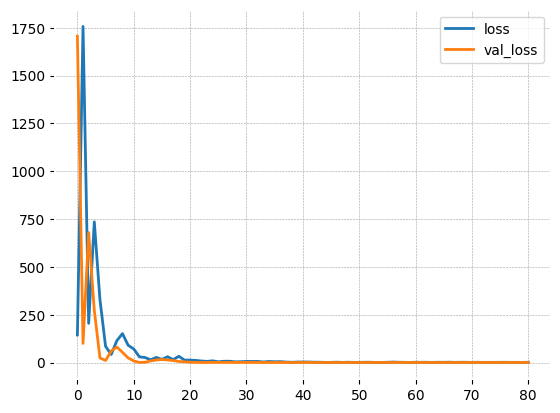

In [61]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))